In [2]:
# 🏨 Airbnb Hotel Booking Analysis Project
# Dataset: Airbnb_Open_Data.xlsx
# Tool: Python (Google Colab)
# Objective: Analyze Airbnb listings and predict price trends

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For better visualization
sns.set(style="whitegrid")

In [5]:
from google.colab import files
import pandas as pd

# Upload dataset manually
uploaded = files.upload()

# Use the actual uploaded filename
file_path = "/content/1730285881-Airbnb_Open_Data.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)
df.head()



Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (1).xlsx


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [22]:
# Basic dataset information
df.info()

# Summary statistics
print(df.describe())

# Checking for null values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 101811 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101811 non-null  int64         
 1   NAME                            101544 non-null  object        
 2   host id                         101811 non-null  int64         
 3   host_identity_verified          101526 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101783 non-null  object        
 6   neighbourhood                   101796 non-null  object        
 7   lat                             101803 non-null  float64       
 8   long                            101803 non-null  float64       
 9   country                         101284 non-null  object        
 10  country code                    101685 non-null  object      

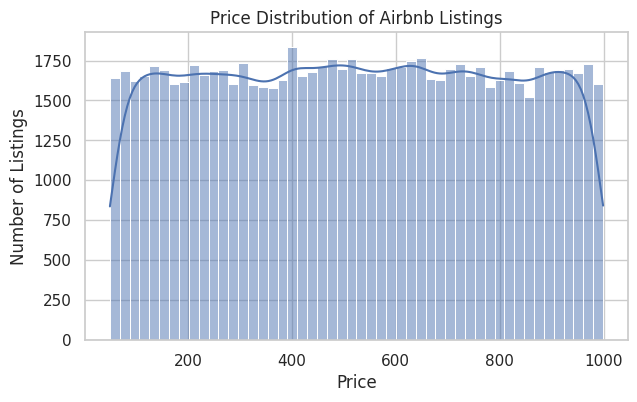

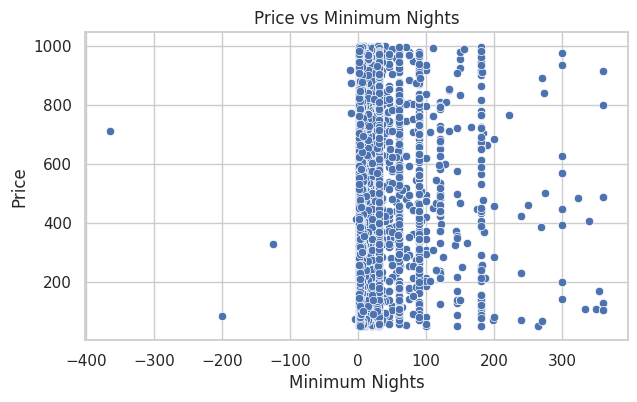

In [23]:
# ===== Clean Column Names =====
df.columns = df.columns.str.strip()  # Remove extra spaces from column names

# ===== Drop rows with missing price values =====
df = df.dropna(subset=['price'])

# ===== Remove duplicate rows =====
df = df.drop_duplicates()

# ===== Replace missing reviews_per_month with 0 =====
df = df.fillna({'reviews_per_month': 0})

# ===== Ensure numeric columns =====
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['minimum nights'] = pd.to_numeric(df['minimum nights'], errors='coerce')

# ===== Drop rows with NaN in 'minimum nights' =====
df_clean = df.dropna(subset=['minimum nights'])

# ===== Filter out extreme outliers =====
df_filtered = df_clean[(df_clean['price'] < 1000) & (df_clean['minimum nights'] < 365)]

# ===== Price Distribution =====
plt.figure(figsize=(7,4))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

# ===== Price vs Minimum Nights Scatter Plot =====
plt.figure(figsize=(7,4))
sns.scatterplot(x='minimum nights', y='price', data=df_filtered)
plt.title("Price vs Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.show()



R² Score: 6.236838372575271e-05
RMSE: 273.1686478885074


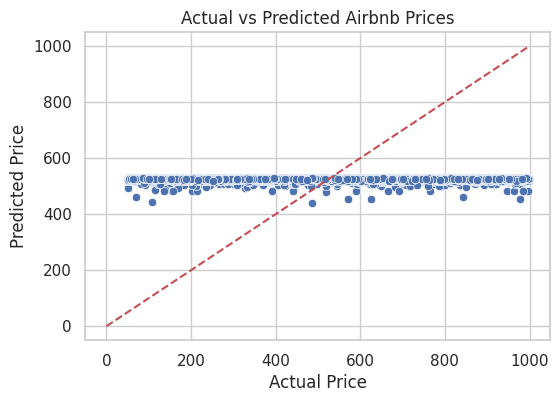

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===== Clean column names =====
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ===== Handle missing and duplicate data =====
df = df.dropna(subset=['price'])
df = df.drop_duplicates()
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# ===== Ensure numeric columns =====
numeric_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ===== Drop rows with NaN in numeric columns =====
df_clean = df.dropna(subset=numeric_cols)

# ===== Filter out extreme outliers =====
df_filtered = df_clean[(df_clean['price'] < 1000) & (df_clean['minimum_nights'] < 365)]

# ===== Select features and target =====
X = df_filtered[['minimum_nights', 'number_of_reviews', 'reviews_per_month']]
y = df_filtered['price']

# ===== Split data =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Linear Regression =====
model = LinearRegression()
model.fit(X_train, y_train)

# ===== Predict =====
y_pred = model.predict(X_test)

# ===== Evaluate =====
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# ===== Final Actual vs Predicted Plot =====
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Airbnb Prices")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')  # reference line y=x
plt.show()

